In [45]:
%pylab inline
from numpy import mean, size
A = imread(r'https://i.stack.imgur.com/Q4nm0.png')

Populating the interactive namespace from numpy and matplotlib


C:\Users\tommy\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['logistic']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


array([[[0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        ...,
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ]],

       [[0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        ...,
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ]],

       [[0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        ...,
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.9490196, 1.       ],
        [0.9490196, 0.9490196, 0.949019

In [47]:
shape(A)

(424, 448, 4)

In [52]:
A1 = mean(A,2)
full_pc = size(A1, axis=1)
full_pc

448

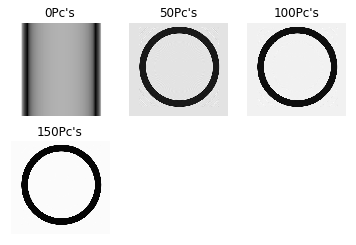

In [55]:
from sklearn import decomposition
from matplotlib import pyplot as plt

components = range(0, 200, 50)
fig = plt.figure()

for i, num_pc in enumerate(components, 1):
    pca = decomposition.PCA(n_components=num_pc)
    pca.fit(A1)
    
    Rec = pca.inverse_transform(pca.transform(A1))
    ax = fig.add_subplot(2,3,i, frame_on=False)
    
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(Rec)
    title(str(num_pc) + 'Pc\'s')
    gray()


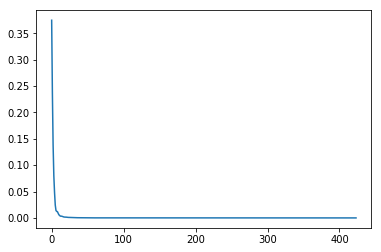

In [66]:
pca1 = decomposition.PCA()
pca1.fit(A1)

var_ratio = pca1.explained_variance_ratio_
components = pca1.components_
plt.plot(var_ratio)

In [35]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [16]:
import sklearn.model_selection as ms
Xtrain, Xtest, Ytrain, Ytest =\
ms.train_test_split(X,Y,
                  test_size = 0.3, random_state=7)

In [26]:
from sklearn import decomposition

IrisPCA = decomposition.PCA()
Iris_Decomp = IrisPCA.fit(Xtrain)
X_Decomp = Iris_Decomp.transform(Xtrain)
var_ratio = IrisPCA.explained_variance_ratio_

Text(0,0.5,'explained_variance_ratio')

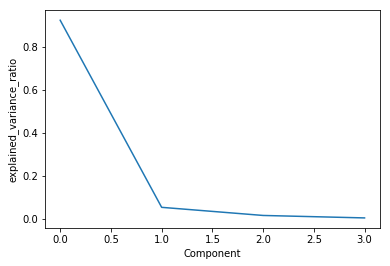

In [31]:
plt.plot(var_ratio)
plt.xlabel('Component')

plt.ylabel("explained_variance_ratio")

In [43]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()

pipe = Pipeline(steps=[('pca', pca), \
                      ('logistic', logistic)])

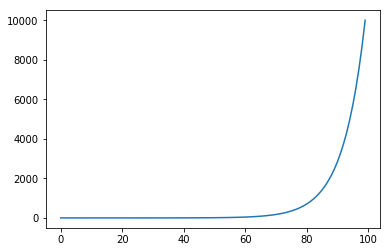

In [38]:
from sklearn.model_selection import GridSearchCV

n_components = list(range(1,3))
Cs = np.logspace(-2,4,100)

In [44]:
Iris_cls = GridSearchCV(pipe, \
                       dict(pca__n_components = n_components, \
                           logistic__C = Cs),\
                           cv = ms.KFold(n_splits =10))